# This notebook loads 3 files of data for transactions of three financial banks ranked top in NSE<br>
1.YESBANK   25-12-2017-TO-24-12-2019YESBANKALLN.csv<br>
2.INDUSINDBK 25-12-2017-TO-24-12-2019INDUSINDBKALLN.csv<br>
3.SBI 25-12-2017-TO-24-12-2019SBINALLN.csv <br>


# Let's organize imports for the notebook

In [1]:
# making notebook wider in notebook using html trick
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# imports for list dir
from os import listdir
from os.path import isfile, join

# general imports
import pandas as pd
import numpy as np

# imports for plottig graph
import seaborn as sns
import matplotlib.pyplot as plt

# imports for timeseries tests
from statsmodels.tsa.stattools import adfuller



In [2]:
# list all data files in raw data dir
mypath = "./../RAW Data/"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(onlyfiles)

['AAII-AAII_SENTIMENT.csv', '25-12-2017-TO-24-12-2019YESBANKALLN.csv', 'NBER chronology.xlsx', '25-12-2017-TO-24-12-2019INDUSINDBKALLN.csv', '25-12-2017-TO-24-12-2019SBINALLN.csv', 'data_crises.xlsx', 'data_crises.csv', '25-12-2017-TO-24-12-2019RELIANCEALLN.csv']


In [3]:
# loading csvs
vs_yes_bank_df = pd.read_csv(mypath+'25-12-2017-TO-24-12-2019YESBANKALLN.csv')
vs_sbi_bank_df = pd.read_csv(mypath+'25-12-2017-TO-24-12-2019SBINALLN.csv')
vs_indus_bank_df = pd.read_csv(mypath+'25-12-2017-TO-24-12-2019INDUSINDBKALLN.csv')

In [4]:
# removing a data error from original
prev_close = vs_yes_bank_df['Close Price'].shift(1)
prev_close[0] = 310.15
vs_yes_bank_df['Prev Close'] = prev_close

# # repeating process for data consistency
# prev_close = vs_sbi_bank_df['Close Price'].shift(1)
# prev_close[0] = 310.15
# vs_sbi_bank_df['Prev Close'] = prev_close

# # repeating process for data consistency
# prev_close = vs_indus_bank_df['Close Price'].shift(1)
# prev_close[0] = 310.15
# vs_indus_bank_df['Prev Close'] = prev_close


# Printing sample data from each file

In [5]:
print("Shape of yesbank dataset: "+ str(vs_yes_bank_df.shape))
vs_yes_bank_df.head()

Shape of yesbank dataset: (492, 13)


,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades
0,YESBANK,EQ,26-Dec-2017,310.15,310.50,317.90,310.20,315.30,315.50,314.70,9269961,2.917296e+09,98604
1,YESBANK,EQ,27-Dec-2017,315.50,316.65,318.95,313.35,313.90,315.15,316.55,8912485,2.821227e+09,89638
2,YESBANK,EQ,28-Dec-2017,315.15,314.00,316.00,311.80,312.75,313.50,313.99,7927990,2.489325e+09,74137
3,YESBANK,EQ,29-Dec-2017,313.50,313.50,315.80,312.80,315.10,315.15,314.73,4718184,1.484971e+09,51047
4,YESBANK,EQ,01-Jan-2018,315.15,315.50,317.75,311.30,312.30,312.60,314.50,4019878,1.264242e+09,32852


In [6]:
# filtering for EQ series as we have EQ and N2
vs_sbi_bank_df = vs_sbi_bank_df[vs_sbi_bank_df['Series']=='EQ']

print("Shape of SBI bank dataset: "+ str(vs_sbi_bank_df.shape))
vs_sbi_bank_df.head()

Shape of SBI bank dataset: (491, 13)


,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades
0,SBIN,EQ,26-Dec-2017,319.85,318.6,319.95,316.30,317.00,317.15,317.39,9329690,2.961128e+09,63313
3,SBIN,EQ,27-Dec-2017,317.15,316.5,320.30,313.05,313.45,314.85,316.25,14276027,4.514749e+09,72884
6,SBIN,EQ,28-Dec-2017,314.85,315.3,316.50,307.65,308.30,308.40,310.67,20353152,6.323021e+09,112379
10,SBIN,EQ,29-Dec-2017,308.40,310.0,312.00,309.05,310.00,309.90,310.39,11939569,3.705905e+09,98011
13,SBIN,EQ,01-Jan-2018,309.90,310.6,312.75,306.30,306.75,307.10,309.08,12182400,3.765315e+09,75769


In [7]:
# filtering for EQ series as we have EQ and BL
vs_indus_bank_df = vs_indus_bank_df[vs_indus_bank_df['Series']=='EQ']

print("Shape of Indus bank dataset: "+ str(vs_sbi_bank_df.shape))
vs_indus_bank_df.head()

Shape of Indus bank dataset: (491, 13)


,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades
0,INDUSINDBK,EQ,26-Dec-2017,1651.85,1651.8,1668.40,1646.90,1665.05,1664.20,1656.99,772183,1.279499e+09,24512
1,INDUSINDBK,EQ,27-Dec-2017,1664.20,1667.5,1669.90,1648.85,1650.00,1651.10,1659.87,624678,1.036887e+09,30425
2,INDUSINDBK,EQ,28-Dec-2017,1651.10,1649.0,1657.90,1646.65,1650.00,1650.45,1650.74,940604,1.552693e+09,26511
3,INDUSINDBK,EQ,29-Dec-2017,1650.45,1652.0,1661.90,1645.10,1647.40,1648.90,1651.74,702219,1.159881e+09,34963
4,INDUSINDBK,EQ,01-Jan-2018,1648.90,1652.0,1655.95,1618.10,1620.40,1623.85,1633.48,771099,1.259577e+09,31522


Printing columns present in dataset

In [8]:
vs_yes_bank_df.columns

Index(['Symbol', 'Series', 'Date', 'Prev Close', 'Open Price', 'High Price',
       'Low Price', 'Last Price', 'Close Price', 'Average Price',
       'Total Traded Quantity', 'Turnover', 'No. of Trades'],
      dtype='object')

In [9]:
vs_sbi_bank_df.columns

Index(['Symbol', 'Series', 'Date', 'Prev Close', 'Open Price', 'High Price',
       'Low Price', 'Last Price', 'Close Price', 'Average Price',
       'Total Traded Quantity', 'Turnover', 'No. of Trades'],
      dtype='object')

In [10]:
vs_indus_bank_df.columns

Index(['Symbol', 'Series', 'Date', 'Prev Close', 'Open Price', 'High Price',
       'Low Price', 'Last Price', 'Close Price', 'Average Price',
       'Total Traded Quantity', 'Turnover', 'No. of Trades'],
      dtype='object')

# Describing basics statistics of data

In [11]:
vs_yes_bank_df.describe()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,4.920000e+02,4.920000e+02,4.920000e+02
mean,218.766057,219.262500,223.494614,213.864634,218.322866,218.239736,218.750325,8.839657e+07,9.950062e+09,3.171731e+05
std,110.223297,110.361568,111.181231,109.534551,110.389308,110.404146,110.356524,1.157664e+08,7.886934e+09,2.513020e+05
min,32.000000,35.200000,41.450000,29.000000,32.200000,32.000000,36.100000,9.450270e+05,2.382886e+08,1.000000e+00
25%,111.475000,111.750000,114.375000,108.100000,109.587500,109.937500,110.665000,1.337325e+07,4.348789e+09,1.279252e+05
50%,218.450000,218.175000,225.300000,211.425000,218.400000,217.875000,216.310000,4.136113e+07,8.063836e+09,2.429845e+05
75%,323.737500,325.075000,328.912500,318.500000,324.200000,323.737500,324.652500,1.203596e+08,1.310020e+10,4.347495e+05
max,394.000000,396.800000,404.000000,392.550000,394.750000,394.000000,398.730000,8.369675e+08,7.212723e+10,1.788274e+06


In [12]:
vs_sbi_bank_df.describe()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,4.910000e+02,4.910000e+02,491.000000
mean,291.902037,292.371487,296.230855,287.979939,291.967617,291.925662,292.099145,2.533715e+07,7.433046e+09,166030.786151
std,30.943641,31.032906,31.131827,30.777303,31.024989,30.969440,30.842957,1.485919e+07,4.500867e+09,84254.946369
min,233.200000,233.250000,238.800000,232.350000,233.250000,233.200000,234.730000,3.312160e+06,9.496387e+08,31229.000000
25%,268.100000,268.000000,272.000000,263.300000,268.000000,268.100000,267.835000,1.607880e+07,4.628063e+09,111618.500000
50%,287.700000,288.700000,292.400000,284.100000,288.050000,287.700000,288.620000,2.110080e+07,6.168998e+09,146297.000000
75%,309.925000,311.000000,315.275000,305.950000,309.950000,309.925000,310.320000,3.035603e+07,8.950683e+09,189658.000000
max,372.400000,371.950000,373.800000,366.200000,373.000000,372.400000,369.990000,1.284493e+08,3.944363e+10,656753.000000


In [13]:
vs_indus_bank_df.describe()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.00000,491.000000,4.910000e+02,4.910000e+02,491.000000
mean,1629.252546,1630.893483,1651.436660,1606.899593,1629.167515,1628.98778,1629.451446,2.765534e+06,4.223986e+09,89410.498982
std,201.352622,200.935101,198.156944,204.509267,201.766460,201.40831,200.776711,2.434428e+06,3.384781e+09,59642.425581
min,1223.200000,1235.950000,1253.950000,1188.050000,1227.000000,1223.20000,1219.080000,1.404350e+05,2.082968e+08,5079.000000
25%,1476.625000,1480.900000,1500.575000,1458.050000,1476.425000,1476.62500,1478.120000,1.048208e+06,1.832247e+09,47797.000000
50%,1603.900000,1607.850000,1628.000000,1581.400000,1601.450000,1603.85000,1604.140000,2.034198e+06,3.289031e+09,72546.000000
75%,1796.100000,1796.000000,1817.900000,1760.375000,1792.500000,1796.10000,1792.015000,3.680911e+06,5.552853e+09,114170.000000
max,2023.050000,2033.100000,2038.000000,2003.450000,2022.000000,2023.05000,2022.360000,1.857861e+07,2.739220e+10,442276.000000


# Pre-processing Data Types of our data

In [14]:
vs_yes_bank_df['Date'] = pd.to_datetime(vs_yes_bank_df['Date'])
vs_yes_bank_df = vs_yes_bank_df.set_index('Date')
vs_yes_bank_df.dtypes

Symbol                    object
Series                    object
Prev Close               float64
Open Price               float64
High Price               float64
Low Price                float64
Last Price               float64
Close Price              float64
Average Price            float64
Total Traded Quantity      int64
Turnover                 float64
No. of Trades              int64
dtype: object

In [15]:
vs_sbi_bank_df['Date'] = pd.to_datetime(vs_sbi_bank_df['Date'])
vs_sbi_bank_df = vs_sbi_bank_df.set_index('Date')
vs_sbi_bank_df.dtypes

Symbol                    object
Series                    object
Prev Close               float64
Open Price               float64
High Price               float64
Low Price                float64
Last Price               float64
Close Price              float64
Average Price            float64
Total Traded Quantity      int64
Turnover                 float64
No. of Trades              int64
dtype: object

In [16]:
vs_indus_bank_df['Date'] = pd.to_datetime(vs_indus_bank_df['Date'])
vs_indus_bank_df = vs_indus_bank_df.set_index('Date')
vs_indus_bank_df.dtypes

Symbol                    object
Series                    object
Prev Close               float64
Open Price               float64
High Price               float64
Low Price                float64
Last Price               float64
Close Price              float64
Average Price            float64
Total Traded Quantity      int64
Turnover                 float64
No. of Trades              int64
dtype: object

# Plotting data on Timeline

//anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'YES BANK TIME SERIES PLOT')

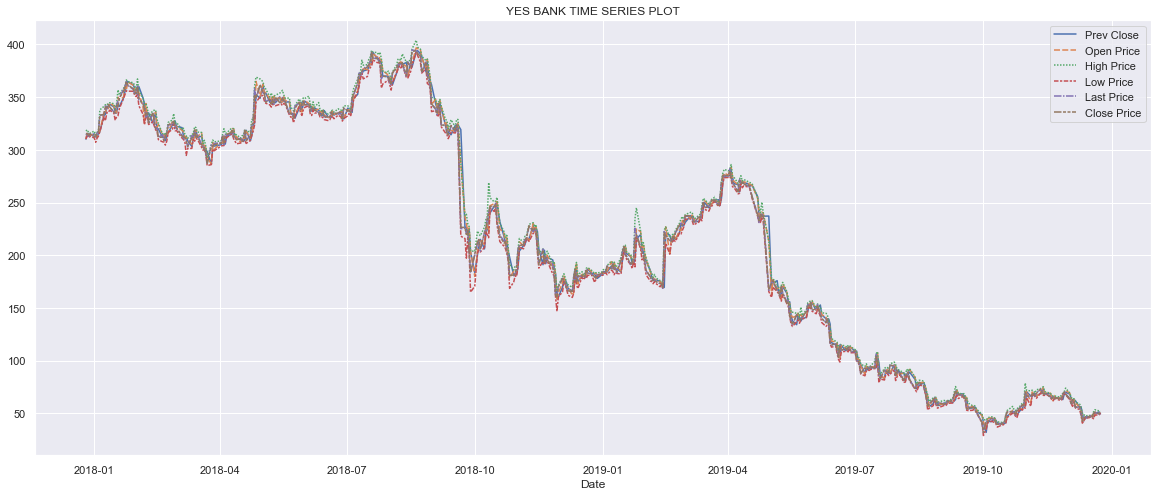

In [17]:
sns.set(rc={'figure.figsize':(20,8)})
sns.lineplot(data = vs_yes_bank_df[['Prev Close', 'Open Price', 'High Price',
       'Low Price', 'Last Price', 'Close Price']])
plt.title('YES BANK TIME SERIES PLOT')

Text(0.5, 1.0, 'SBI BANK TIME SERIES PLOT')

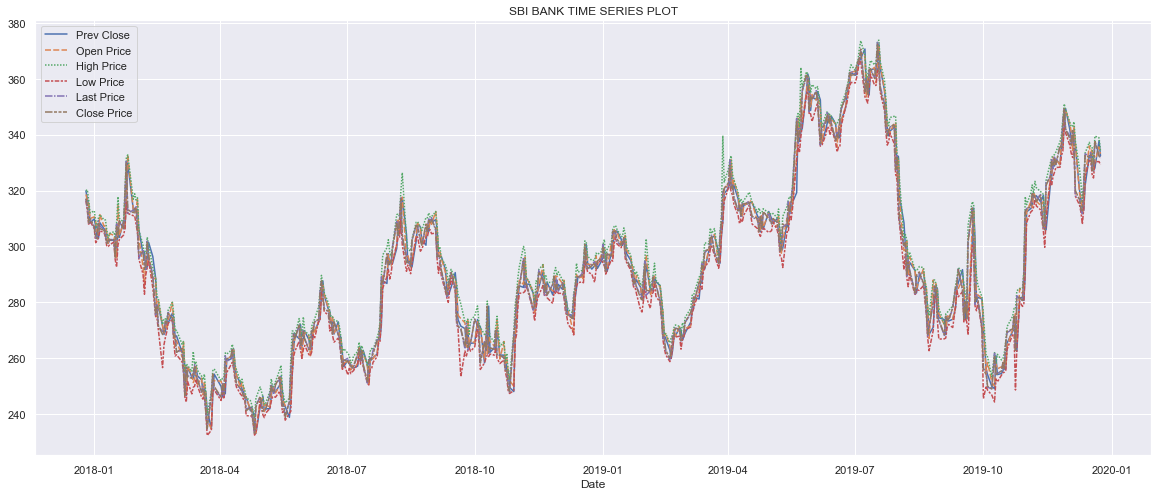

In [18]:
sns.set(rc={'figure.figsize':(20,8)})
sns.lineplot(data = vs_sbi_bank_df[['Prev Close', 'Open Price', 'High Price',
       'Low Price', 'Last Price', 'Close Price']])
plt.title('SBI BANK TIME SERIES PLOT')

Text(0.5, 1.0, 'INDUS BANK TIME SERIES PLOT')

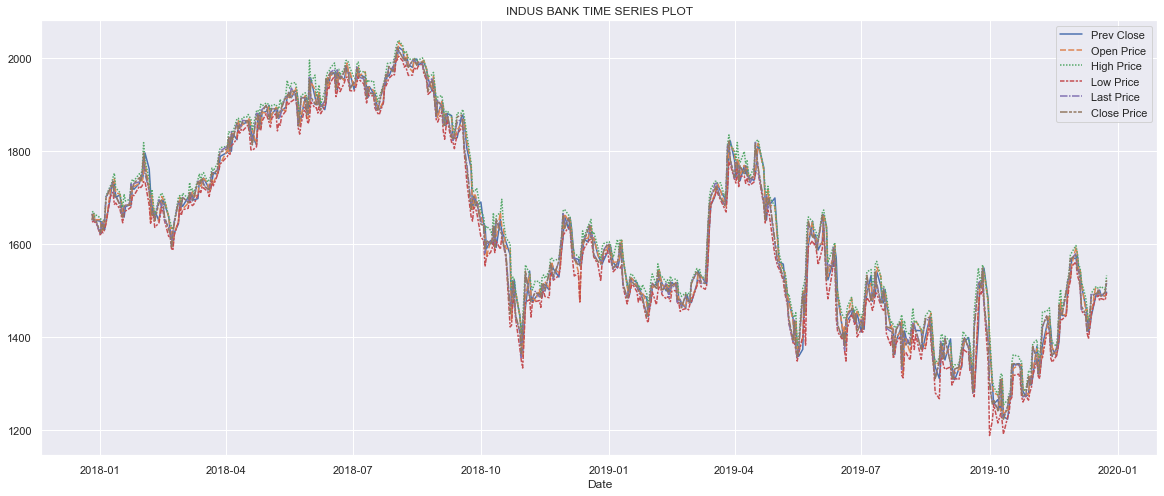

In [19]:
sns.set(rc={'figure.figsize':(20,8)})
sns.lineplot(data = vs_indus_bank_df[['Prev Close', 'Open Price', 'High Price',
       'Low Price', 'Last Price', 'Close Price']])
plt.title('INDUS BANK TIME SERIES PLOT')

# Daily gain analysis
1. Let's calculate daily gain <br>
2. Print statistics of daily gain <br>
3. Plot time series graphs for daily gain <br>

Text(0.5, 1.0, 'YES BANK GAIN TIME SERIES PLOT')

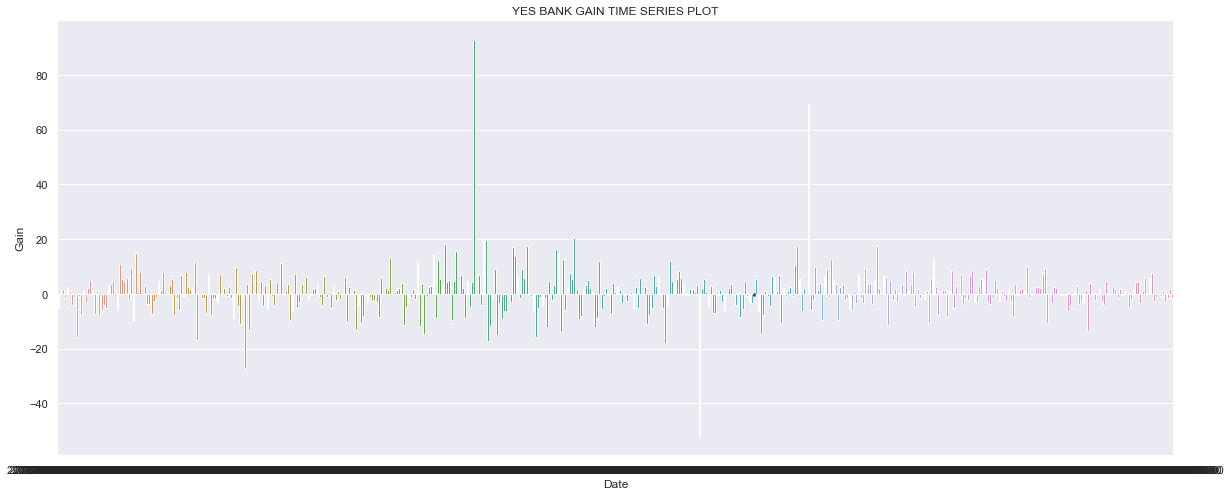

In [20]:
vs_yes_bank_df['Gain'] = vs_yes_bank_df['Prev Close'] - vs_yes_bank_df['Close Price']
vs_yes_bank_df['Date'] = [str(x) for x in vs_yes_bank_df.index]
sns.barplot(x ='Date',y ='Gain', data = vs_yes_bank_df)
plt.title('YES BANK GAIN TIME SERIES PLOT')

Text(0.5, 1.0, 'SBI BANK GAIN TIME SERIES PLOT')

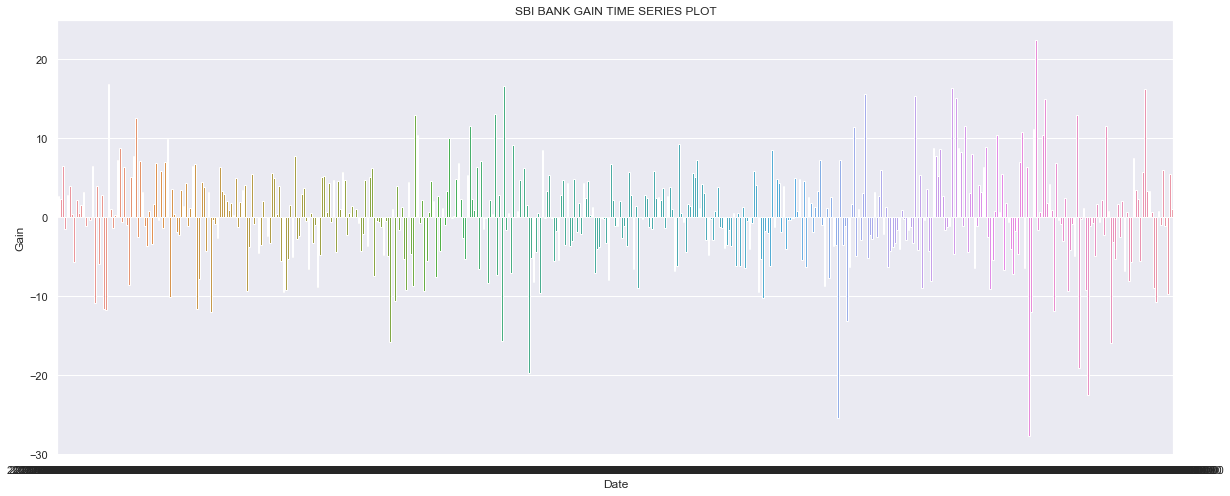

In [21]:
vs_sbi_bank_df['Gain'] = vs_sbi_bank_df['Prev Close'] - vs_sbi_bank_df['Close Price']
vs_sbi_bank_df['Date'] = [str(x) for x in vs_sbi_bank_df.index]
sns.barplot(x ='Date',y ='Gain', data = vs_sbi_bank_df)
plt.title('SBI BANK GAIN TIME SERIES PLOT')

Text(0.5, 1.0, 'INDUS BANK GAIN TIME SERIES PLOT')

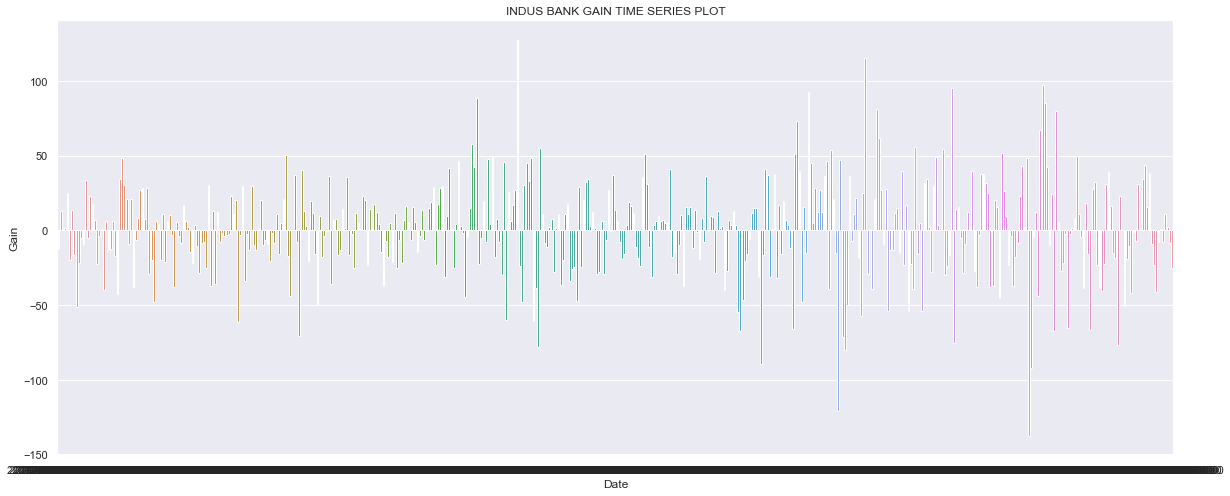

In [22]:
vs_indus_bank_df['Gain'] = vs_indus_bank_df['Prev Close'] - vs_indus_bank_df['Close Price']
vs_indus_bank_df['Date'] = [str(x) for x in vs_indus_bank_df.index]
sns.barplot(x ='Date',y ='Gain', data = vs_indus_bank_df)
plt.title('INDUS BANK GAIN TIME SERIES PLOT')

# Test for staionarity 

In [23]:
#Test for staionarity
def test_stationarity(timeseries, tsname):
    print("Analysis for :"+ tsname)
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    

Analysis for :YES BANK


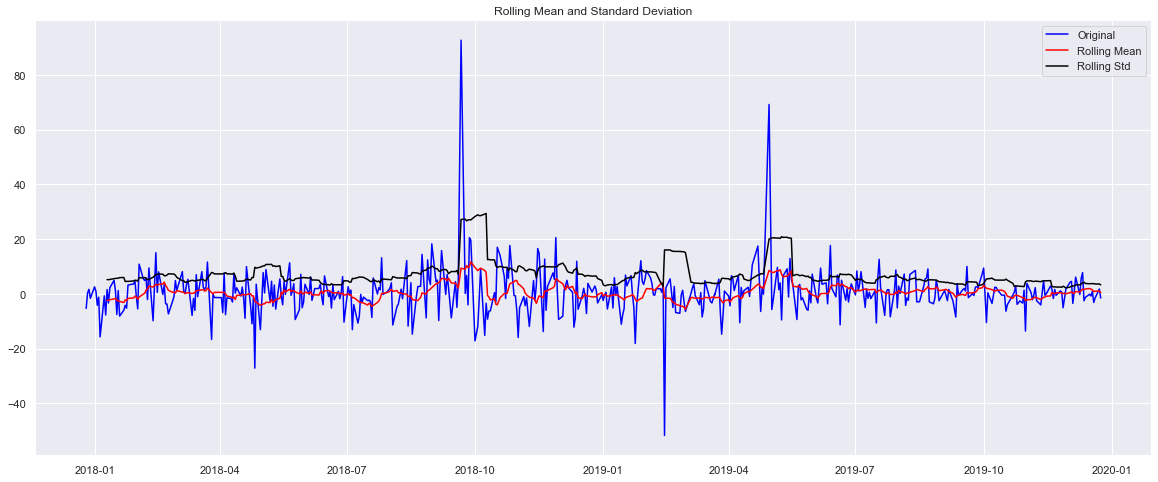

Results of dickey fuller test
Test Statistics                -22.142613
p-value                          0.000000
No. of lags used                 0.000000
Number of observations used    491.000000
critical value (1%)             -3.443739
critical value (5%)             -2.867444
critical value (10%)            -2.569915
dtype: float64


In [24]:
# Test for staionarity yes bank
test_stationarity(vs_yes_bank_df['Gain'],"YES BANK")

Critical values are no where close to the Test Statistics. Hence, we can say that our Time Series at the moment is not stationary

Analysis for :YES BANK


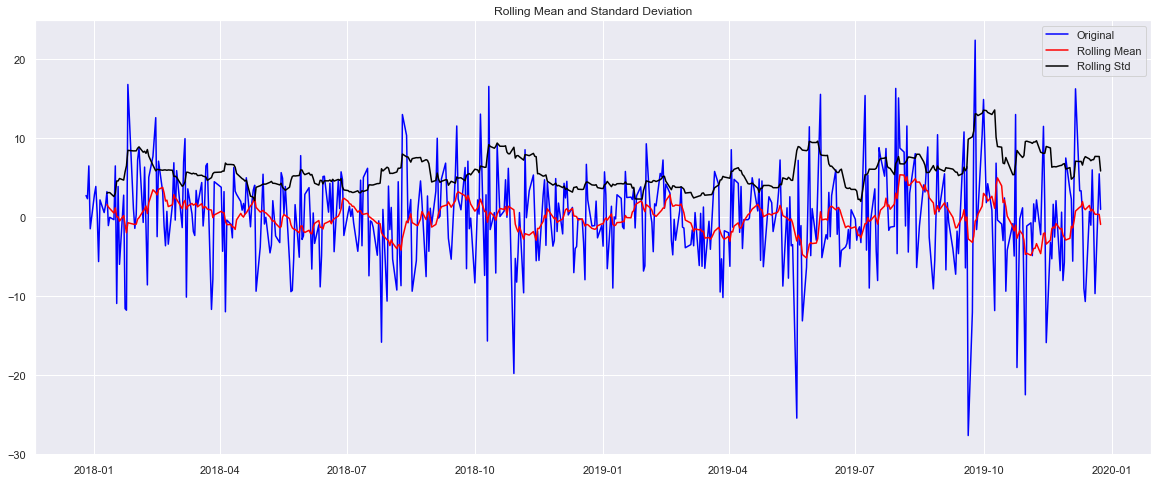

Results of dickey fuller test
Test Statistics                -22.153361
p-value                          0.000000
No. of lags used                 0.000000
Number of observations used    490.000000
critical value (1%)             -3.443766
critical value (5%)             -2.867457
critical value (10%)            -2.569921
dtype: float64


In [25]:
# Test for staionarity sbi bank
test_stationarity(vs_sbi_bank_df['Gain'],"YES BANK")

Critical values are no where close to the Test Statistics. Hence, we can say that our Time Series at the moment is not stationary

Analysis for :INDUS BANK


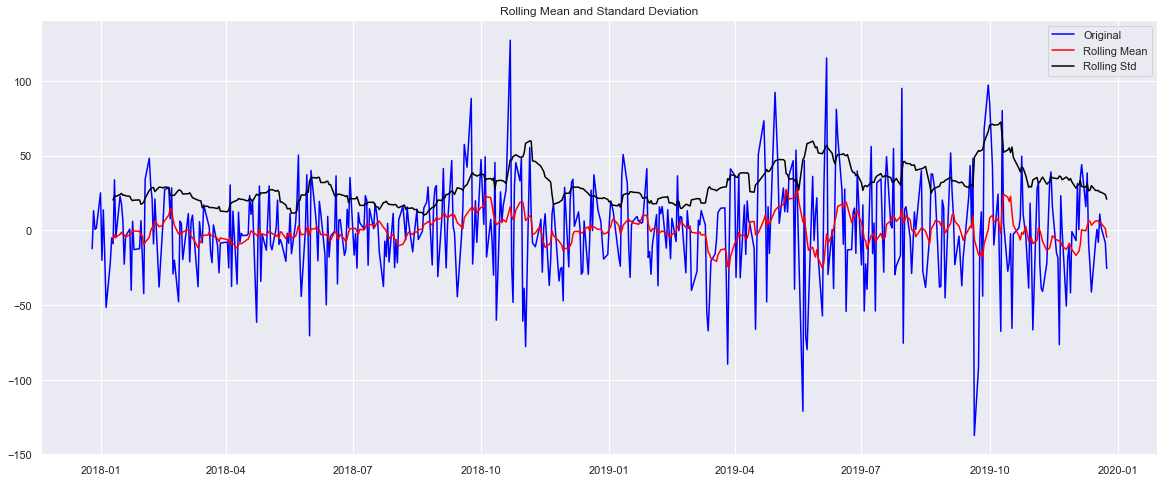

Results of dickey fuller test
Test Statistics               -8.293729e+00
p-value                        4.194252e-13
No. of lags used               7.000000e+00
Number of observations used    4.830000e+02
critical value (1%)           -3.443962e+00
critical value (5%)           -2.867543e+00
critical value (10%)          -2.569967e+00
dtype: float64


In [26]:
# Test for staionarity indus bank
test_stationarity(vs_indus_bank_df['Gain'],"INDUS BANK")

Critical values are no where close to the Test Statistics. Hence, we can say that our Time Series at the moment is not stationary